# MVP Análise de Dados e Boas Práticas (COVID-19)

**Nome:** Eduardo Camargo Ribeiro Borges

**Matrícula:** 4052025000487

**Dataset:** [COVID-19 Dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

# Descrição do Problema

O conjunto de dados COVID-19 é um conjunto de dados multivariado que consiste em informações clínicas, demográficas e institucionais de pacientes testados para COVID-19. As variáveis incluem idade, sexo, presença de comorbidades (como diabetes, hipertensão e obesidade), tipo de atendimento recebido, além de indicadores como intubação, internação em UTI e desfecho clínico. O objetivo principal é classificar se um paciente é de alto risco ou não, com base em suas características pessoais e condições de saúde, permitindo identificar perfis que demandam maior atenção médica.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe relação entre idade e mortalidade por COVID-19?

- Comorbidades aumentam a chance de óbito?

- A intubação e o uso de UTI indicam maior gravidade e risco de morte?

## Tipo de Problema

Trata-se de um problema de classificação supervisionada. A partir de um conjunto de informações sobre os pacientes — como idade, sexo, comorbidades, tipo de atendimento e indicadores clínicos — o objetivo é prever se o paciente se enquadra na categoria de alto risco ou baixo risco para complicações causadas pela COVID-19.

## Seleção de Dados

O dataset de COVID-19 utilizado neste projeto é composto por dados brutos provenientes de registros clínicos e institucionais, o que torna necessária uma etapa prévia de seleção e tratamento dos dados. Lidar com registros incompletos ou inconsistentes e, principalmente, definir com clareza os critérios que determinam se um paciente será classificado como de alto ou baixo risco. Essa preparação é essencial para garantir que as análises e os modelos preditivos sejam construídos sobre uma base de dados confiável e representativa.

## Atributos do Dataset de COVID-19

O dataset de COVID-19 contém 1,048,576 de registros de pacientes testados para a doença, com informações clínicas, demográficas e institucionais. Abaixo estão os 21 atributos presentes:

- **sex**: sexo do paciente (1 para feminino, 2 para masculino)
- **age**: idade do paciente
- **classification**: resultado do teste para COVID-19 (valores de 1 a 3 indicam diagnóstico positivo, 4 indica que o paciente não foi diagnosticado com covid ou o teste foi inconclusivo)
- **patient type**: tipo de atendimento recebido (1 para retorno casa, 2 para hospitalização)
- **pneumonia**: presença de pneumonia no momento do diagnóstico (1 para sim, 2 para não)
- **pregnancy**: se o paciente está grávido (1 para sim, 2 para não)
- **diabetes**: presença de diabetes
- **copd**: presença de doença pulmonar obstrutiva crônica
- **asthma**: presença de asma
- **inmsupr**: condição de imunossupressão
- **hypertension**: presença de hipertensão
- **cardiovascular**: presença de doença cardiovascular
- **renal chronic**: presença de doença renal crônica
- **other disease**: presença de outras doenças
- **obesity**: presença de obesidade
- **tobacco**: uso de tabaco
- **usmr**: nível da unidade médica que atendeu o paciente (níveis 1,2,3)
- **medical unit**: tipo de instituição de saúde que realizou o atendimento
- **intubed**: se o paciente foi intubado (1 para sim, 2 para não)
- **icu**: se o paciente foi internado em UTI (1 para sim, 2 para não)
- **date died**: data do óbito do paciente (ou "9999-99-99" caso tenha sobrevivido)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset COVID-19.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Realizando o download do CSV.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meirnizri/covid19-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/covid19-dataset


Nesse dataset é necessário fazer um tratamento simples para facilitar as análises.

In [ ]:
# guardo o dataset em um dataframe
df = pd.read_csv(path+'/Covid Data.csv')
df.columns = df.columns.str.lower()

In [ ]:
# primeiras linhas dataframe 1
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset COVID-19, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset contém 1.048.575 instâncias (observações) e 21 atributos. Entre eles, 20 são do tipo numérico inteiro (int), porém, ao analisar o conteúdo, percebe-se que 19 desses atributos representam variáveis categóricas codificadas numericamente — como sexo, presença de comorbidades e tipo de atendimento médico. Apenas a variável age (idade) é verdadeiramente numérica e contínua. Já o atributo date_died é do tipo object, representando a data de óbito do paciente, quando aplicável.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   usmer                 1048575 non-null  int64   
 1   medical_unit          1048575 non-null  int64   
 2   sex                   1048575 non-null  int64   
 3   patient_type          1048575 non-null  int64   
 4   intubed               1048575 non-null  boolean 
 5   pneumonia             1048575 non-null  boolean 
 6   age                   1048575 non-null  int64   
 7   pregnant              1048575 non-null  boolean 
 8   diabetes              1048575 non-null  boolean 
 9   copd                  1048575 non-null  boolean 
 10  asthma                1048575 non-null  boolean 
 11  inmsupr               1048575 non-null  boolean 
 12  hipertension          1048575 non-null  boolean 
 13  other_disease  

Embora, à primeira vista, o dataset não apresente valores nulos explícitos, a documentação revela que os valores '9999-99-99', 97, 98 e 99 são utilizados como códigos para representar dados ausentes ou não informados. Portanto, é fundamental realizar o tratamento desses valores logo no início do processo de análise, substituindo-os por null (ou NaN), a fim de garantir uma interpretação mais precisa e confiável dos dados na etapa de exploração.

### Definição de valores nulos.
Para a definição, é assumindo que não deve ser aplicado em idade (age) pois podem existir pessoas com 97, 98 e 99 anos.

In [ ]:
# Seleciona todas as colunas exceto 'age'
columns_to_treat = df.columns[df.columns != 'age']

# Substitui os valores nas colunas selecionadas
df[columns_to_treat] = df[columns_to_treat].replace(['9999-99-99', 97, 98, 99], np.nan)

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   usmer                 1048575 non-null  int64  
 1   medical_unit          1048575 non-null  int64  
 2   sex                   1048575 non-null  int64  
 3   patient_type          1048575 non-null  int64  
 4   date_died             76942 non-null    object 
 5   intubed               192706 non-null   float64
 6   pneumonia             1032572 non-null  float64
 7   age                   1048575 non-null  int64  
 8   pregnant              521310 non-null   float64
 9   diabetes              1045237 non-null  float64
 10  copd                  1045572 non-null  float64
 11  asthma                1045596 non-null  float64
 12  inmsupr               1045171 non-null  float64
 13  hipertension          1045471 

## Estatísticas Descritivas

As estatísticas descritivas fornecem um resumo das principais características numéricas de um conjunto de dados, como média, desvio padrão, valores mínimo e máximo, além dos quartis.

No caso deste dataset, apenas o atributo age (idade) representa uma variável contínua adequada para esse tipo de análise. Os demais campos, embora armazenados como inteiros, representam variáveis categóricas codificadas numericamente sendo na maioria booleanas, e portanto, a interpretação estatística direta (como média ou desvio padrão) não é apropriada.

Essa observação pode ser confirmada ao analisar a saída do comando describe() a seguir.

In [ ]:
# estatísticas descritivas básicas do dataset
df.describe().round(2)

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
count,1048575.00,1048575.00,1048575.0,1048575.00,192706.00,1032572.00,1048575.00,521310.00,1045237.00,1045572.00,1045596.00,1045171.00,1045471.00,1043530.00,1045499.00,1045543.00,1045569.00,1045355.00,1048575.00,192543.00
mean,1.63,8.98,1.5,1.19,1.83,1.86,41.79,1.98,1.88,1.99,1.97,1.99,1.84,1.97,1.98,1.85,1.98,1.92,5.31,1.91
std,0.48,3.72,0.5,0.39,0.38,0.34,16.91,0.12,0.32,0.12,0.17,0.12,0.36,0.16,0.14,0.36,0.13,0.27,1.88,0.28
min,1.00,1.00,1.0,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,4.00,1.0,1.00,2.00,2.00,30.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00
50%,2.00,12.00,1.0,1.00,2.00,2.00,40.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,2.00
75%,2.00,12.00,2.0,1.00,2.00,2.00,53.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,2.00
max,2.00,13.00,2.0,2.00,2.00,2.00,121.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,2.00


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

Neste caso, esta sendo avaliado apenas o atributo age

In [ ]:
# média dos atributos numéricos do dataset
df['age'].describe().loc['mean']

np.float64(41.794102472403026)

O atributo age possui uma média aproximada de 41,79 anos. Para avaliar se esse valor é representativo da distribuição dos dados, é interessante visualizá-lo por meio de um boxplot, o que permite identificar a presença de assimetrias, outliers e a concentração dos valores em torno da média.

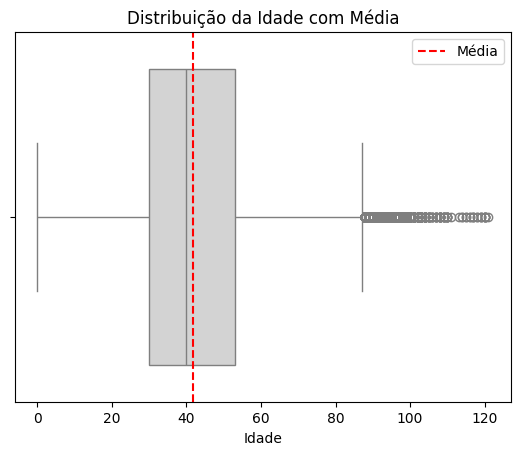

In [ ]:
sns.boxplot(x=df['age'], color='lightgray')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Média')
plt.title('Distribuição da Idade com Média')
plt.xlabel('Idade')
plt.legend()
plt.show()

O boxplot do campo idade revela que a média (~41,79) esta situada um pouco acima da mediana. A maioria dos pacientes tem idade entre ~30 e ~55 anos, enquanto há uma quantidade significativa de outliers com idades acima de ~85 anos, caracterizando uma cauda longa. Essa questão pode impactar análises que dependem da média como medida central, pois podem puxar a média pra cima.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df['age'].describe().loc['std']

np.float64(16.907389199431833)

O atributo idade apresenta um desvio padrão de aproximadamente 16,90 anos, o que indica que, em média, as idades dos pacientes variam cerca de 17 anos em relação à média geral (41,79 anos).

Esse valor sugere uma dispersão moderada a alta na distribuição etária: os pacientes não estão concentrados em uma única faixa etária, mas sim distribuídos entre jovens, adultos e idosos.


### Dados Númericos

### age
Idade dos pacientes

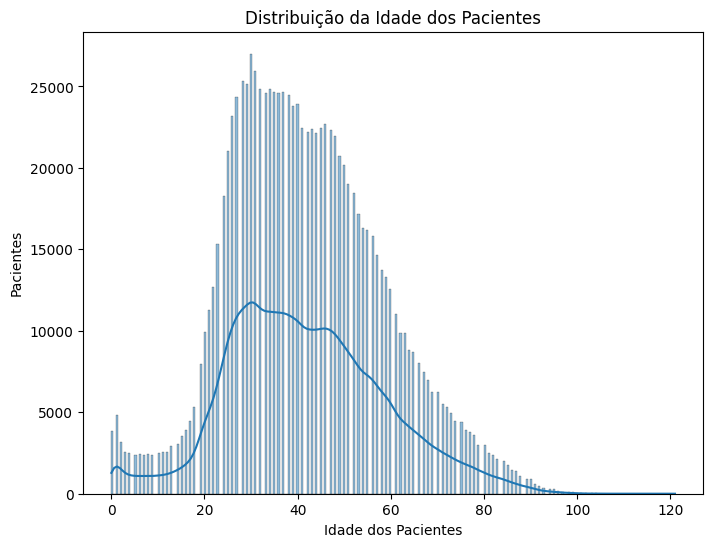

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade dos Pacientes')
plt.ylabel('Pacientes')
plt.show()

O histograma da idade dos pacientes revela uma distribuição assimétrica à direita, com a maior concentração de casos entre 25 e 35 anos. A média de idade gira em torno de 41 anos, e observa-se uma queda gradual na frequência conforme a idade avança, indicando que há menos pacientes idosos no conjunto de dados. A presença de pacientes com menos de 10 anos é pequena, mas ainda perceptível. A distribuição mostra que a maioria dos pacientes são adultos jovens e de meia-idade, o que pode estar relacionado à maior exposição ou acesso ao sistema de saúde por esse grupo.

### Dados Categoricos

### usmer
Indica se o paciente foi atendido em unidades médicas de primeiro, segundo ou terceiro nível.

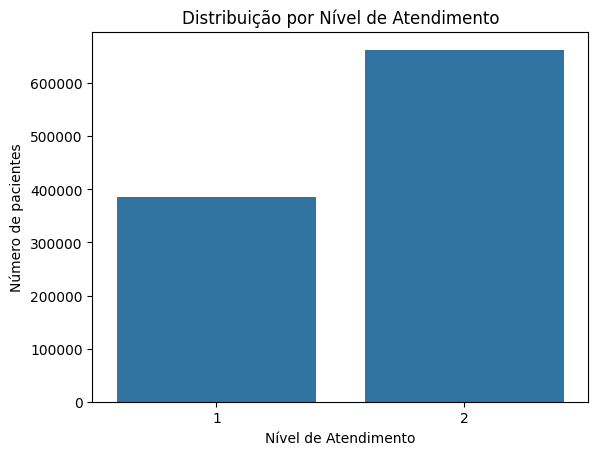

In [ ]:
# Contagem por Nível de Atendimento
sns.countplot(x='usmer', data=df)
plt.title('Distribuição por Nível de Atendimento')
plt.xlabel('Nível de Atendimento')
plt.ylabel('Número de pacientes')
plt.show()

Verifica-se que a maior parte dos pacientes foi atendido no nivel 2, acima de 600.000 pacientes, o nivel 1 teve aproximadamente 390.000 pacientes atendidos, o nível 3 não possuí registros.

### medical_unit
unidade médica que tratou o paciente

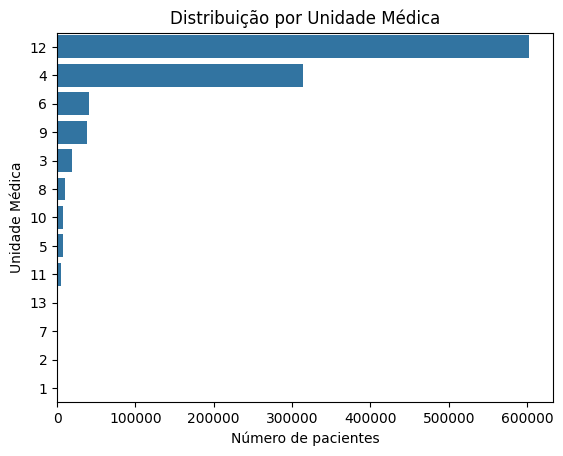

In [ ]:
# Contagem por unidade médica
order = df['medical_unit'].value_counts().index

sns.countplot(y='medical_unit', order=order, data=df)
plt.title('Distribuição por Unidade Médica')
plt.xlabel('Número de pacientes')
plt.ylabel('Unidade Médica')
plt.show()

Foi escolhido deixar o gráfico de forma horizontal ordenado de forma decressente para gerar um ranking das instituições que mais atenderam pacientes.
Dessa maneira foi identificado que as instituições 12 e 4 são as 2 príncipais  nesse quesito com ~600.000 e ~300.000 pacientes atendidos respectivamente, a partir da terceira instituição os pacientes não chegam a 50.000.

### sex
Indica o sexo do paciente (1 feminino, 2 masculino)

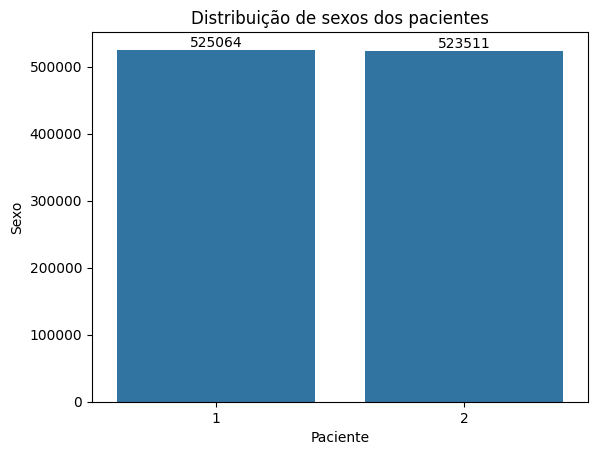

In [ ]:
# Contagem por sexo
ax = sns.countplot(x='sex', data=df)
plt.title('Distribuição de sexos dos pacientes')
plt.xlabel('Paciente')
plt.ylabel('Sexo')

# Adiciona os valores no topo das colunas para análise preicsa
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 5,
        f'{int(height)}',
        ha='center', va='bottom'
    )

plt.show()

Ao analisar a distribuição do sexo dos pacientes por meio de um gráfico de barras, indica que provavelmente o autor dos dados tentou deixa-los balanceados por sexo. Inicialmente eles parecem estar relativamente balanceados. No entanto, ao observar os valores absolutos, percebe-se que há uma maior quantidade de pacientes do sexo feminino (1.553 a mais) em comparação ao masculino. Essa diferença pode impactar algumas análises ou modelos preditivos, sendo recomendável considerar técnicas de balanceamento, caso o desequilíbrio influencie os resultados.

### patient_type
tipo de atendimento que o paciente recebeu na unidade. 1 para retorno ao domicílio e 2 para internação.

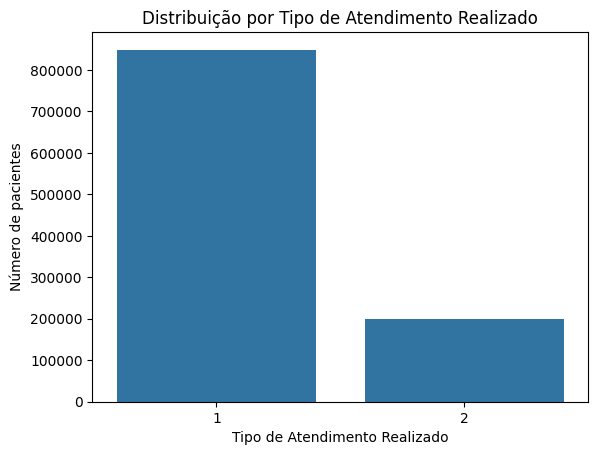

In [ ]:
# Contagem por Tipo de Atendimento Realizado
sns.countplot(x='patient_type', data=df)
plt.title('Distribuição por Tipo de Atendimento Realizado')
plt.xlabel('Tipo de Atendimento Realizado')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico mostra que a maior parte dos pacientes foram enviados para casa. É interessante avaliar se essa ação impactou no risco de morte do paciente.

### intubed
Identifica se no tratamento o paciente foi intubado ou não

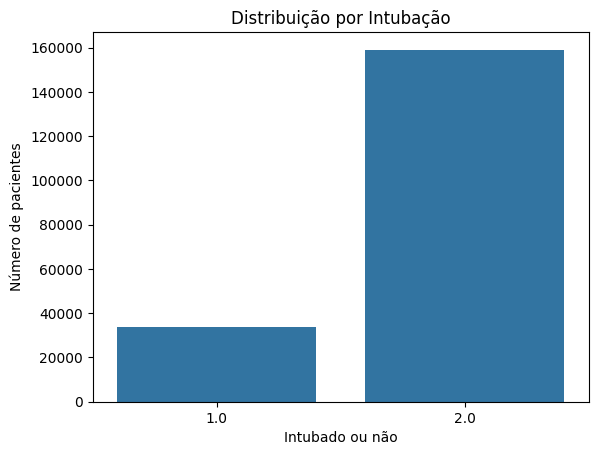

In [ ]:
# Contagem por Intubação
sns.countplot(x='intubed', data=df)
plt.title('Distribuição por Intubação')
plt.xlabel('Intubado ou não')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico de barras mostra claramente que a maioria dos pacientes não foi intubada, representando aproximadamente 160.000 registros, enquanto cerca de 35.000 pacientes foram intubados. É perceptivel que o gráfico só vai até a faixa de 160.000, ou seja, o restante dos pacientes se enquadram nos valores nulos definidos anteriormente

### pneumonia
Identifica se o paciente ja teve pneumonia ou não

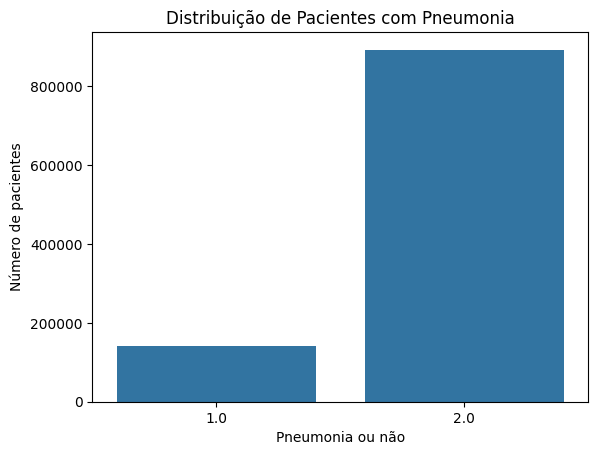

In [ ]:
# Contagem por Pneomonia
sns.countplot(x='pneumonia', data=df)
plt.title('Distribuição de Pacientes com Pneumonia')
plt.xlabel('Pneumonia ou não')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico de barras mostra claramente que a maioria dos pacientes não teve pneumonia, representando mais de 800.000 pacientes, enquanto cerca de 180.000 pacientes tiveram pneumonia.

### pregnant
Identifica se o paciente estava gravido ou não.

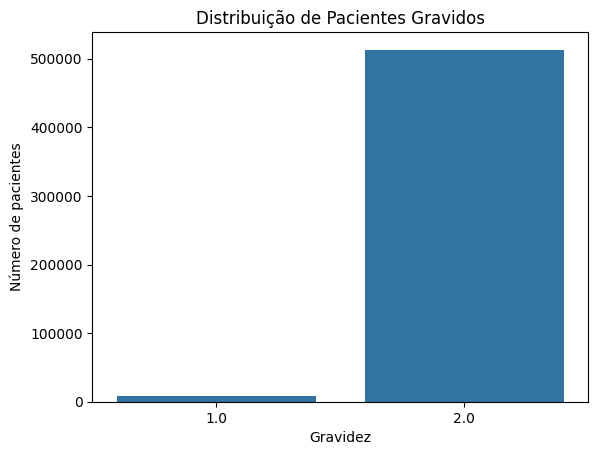

In [ ]:
# Contagem por Pacientes Gravidos
sns.countplot(x='pregnant', data=df)
plt.title('Distribuição de Pacientes Gravidos')
plt.xlabel('Gravidez')
plt.ylabel('Número de pacientes')
plt.show()

A maior parte dos pacientes não estava gravido no momento do registro, como apenas mulheres podem ficar gravidas é interessante incluir um filtro de mulheres para verificar se afeta muito o gráfico

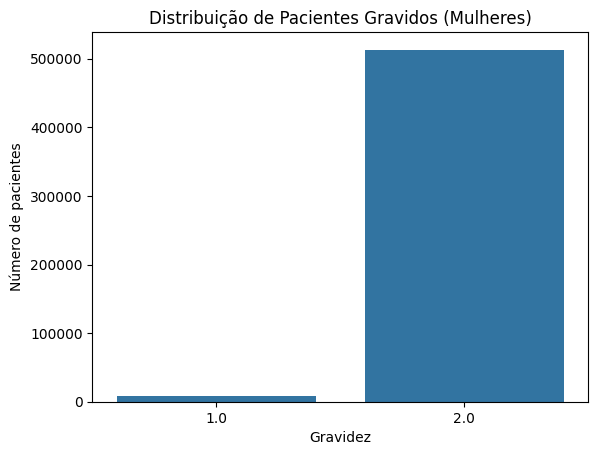

In [ ]:
# Contagem por Pacientes Gravidos - Apenas mulheres

# Filtrando apenas mulheres
df_mulheres = df[df['sex'] == 1]

sns.countplot(x='pregnant', data=df_mulheres)
plt.title('Distribuição de Pacientes Gravidos (Mulheres)')
plt.xlabel('Gravidez')
plt.ylabel('Número de pacientes')
plt.show()

Como o gráfico manteve a mesma quantidade de registros mesmo após a filtragem por mulheres, pode-se interpretar que os valores considerados nulos no campo pregnant correspondem a pacientes do sexo masculino, para os quais essa informação não se aplica.

### diabetes
Identifica se o paciente tem diabetes ou não

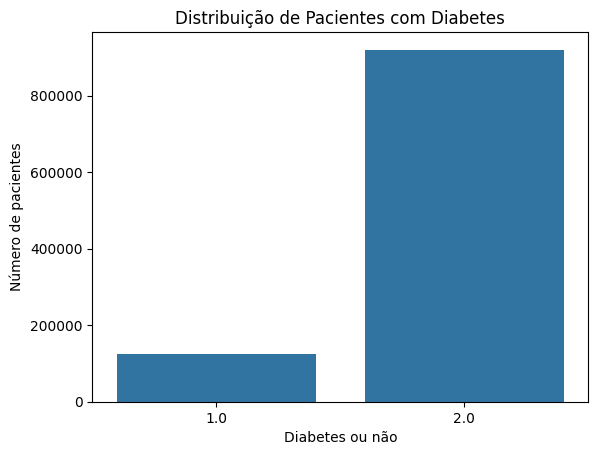

In [ ]:
# Contagem por Diabetes
sns.countplot(x='diabetes', data=df)
plt.title('Distribuição de Pacientes com Diabetes')
plt.xlabel('Diabetes ou não')
plt.ylabel('Número de pacientes')
plt.show()

Mantendo o padrão dos gráficos anteriores, a comorbidade de diabetes afeta a minoria dos pacientes. Posteriormente é interessante verificar o grau de correlação de cada comorbidade com a morte ou não do paciente.

### copd
Identifica se o paciente tem Doença pulmonar obstrutiva crônica DPOC ou não

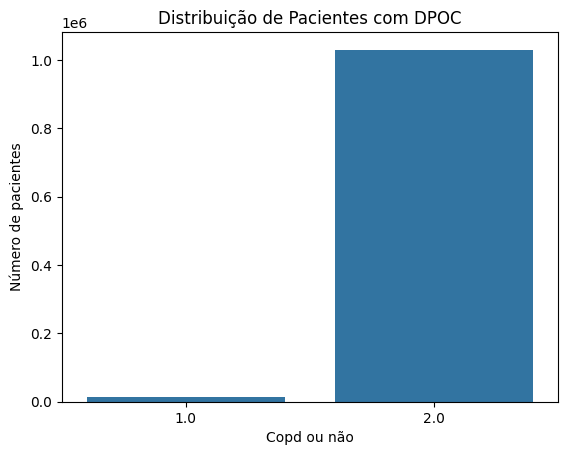

In [ ]:
# Contagem por DPOC
sns.countplot(x='copd', data=df)
plt.title('Distribuição de Pacientes com DPOC')
plt.xlabel('Copd ou não')
plt.ylabel('Número de pacientes')
plt.show()

Esse gráfico é interessante porque a quantidade de pacientes que não possuem DPOC (COPD) representa um número muito maior de pacientes e ultrapassa a casa do milhão, o que acaba influenciando a escala do gráfico. É importante estar atento a esse tipo de situação para não interpretar erroneamente a distribuição dos dados, principalmente quando há grande desbalanceamento entre as classes.

### asthma
Identifica se o paciente tem asma ou não

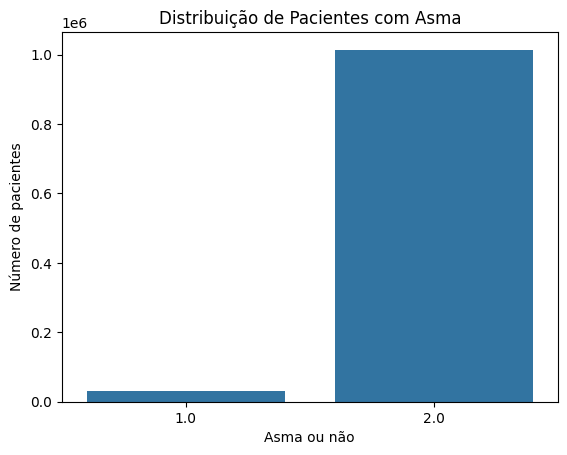

In [ ]:
# Contagem por asma
sns.countplot(x='asthma', data=df)
plt.title('Distribuição de Pacientes com Asma')
plt.xlabel('Asma ou não')
plt.ylabel('Número de pacientes')
plt.show()

Mudança de escala como o gráfico anterior.

### inmsupr
Identifica se o paciente é imunossuprimido ou não.

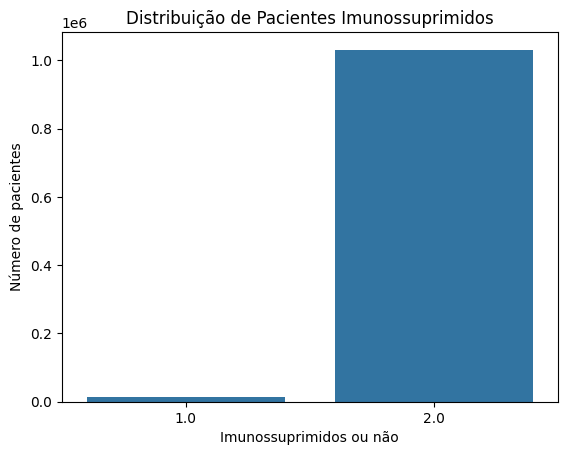

In [ ]:
# Contagem por imunossuprimidos
sns.countplot(x='inmsupr', data=df)
plt.title('Distribuição de Pacientes Imunossuprimidos')
plt.xlabel('Imunossuprimidos ou não')
plt.ylabel('Número de pacientes')
plt.show()

### hipertension
Identifica se o paciente tem hipertensão

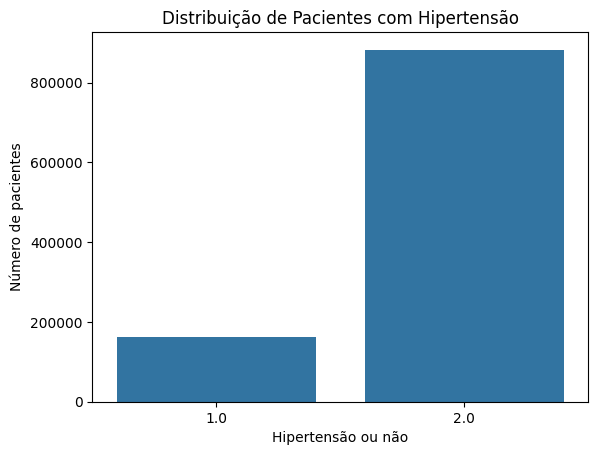

In [ ]:
# Contagem por Hipertensão
sns.countplot(x='hipertension', data=df)
plt.title('Distribuição de Pacientes com Hipertensão')
plt.xlabel('Hipertensão ou não')
plt.ylabel('Número de pacientes')
plt.show()

### other_disease
Identifica se o paciente tem alguma outra doença

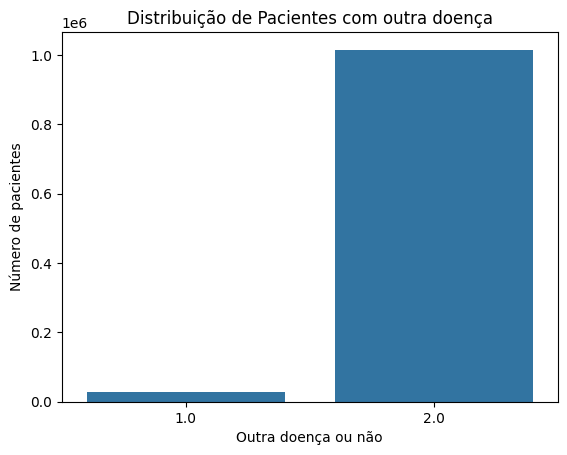

In [ ]:
# Contagem por outra doença
sns.countplot(x='other_disease', data=df)
plt.title('Distribuição de Pacientes com outra doença')
plt.xlabel('Outra doença ou não')
plt.ylabel('Número de pacientes')
plt.show()

O campo "outra doença" apresenta uma complexidade maior de interpretação, pois não se refere a uma condição clínica específica, mas sim a qualquer outra comorbidade não listada individualmente no dataset. Isso torna difícil avaliar com precisão o grau de influência ou correlação com desfechos como óbito ou internação, uma vez que o conteúdo dessa variável pode variar bastante entre os pacientes. Além disso, a falta de padronização ou detalhamento do tipo de doença envolvida limita a capacidade de extrair conclusões mais assertivas a partir dessa informação.

### cardiovascular
Identifica se o paciente tem alguma doença cardiovascular ou não

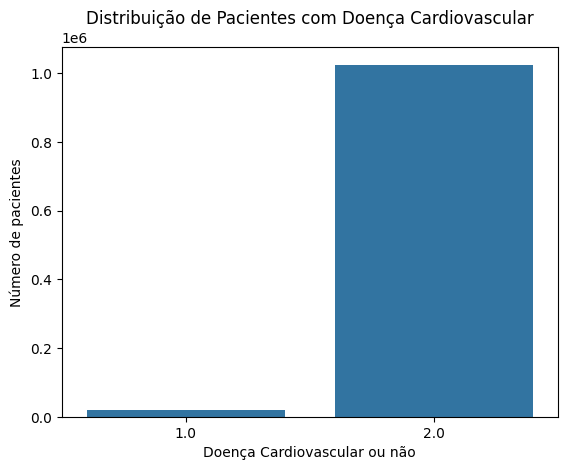

In [ ]:
# Contagem por doença cardiovascular
sns.countplot(x='cardiovascular', data=df)
plt.title('Distribuição de Pacientes com Doença Cardiovascular')
plt.xlabel('Doença Cardiovascular ou não')
plt.ylabel('Número de pacientes')
plt.show()

### obesity
Identifica se o paciente é obeso ou não

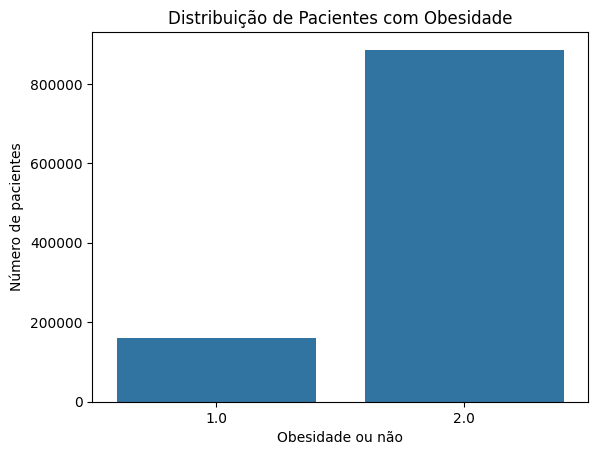

In [ ]:
# Contagem por Obesidade
sns.countplot(x='obesity', data=df)
plt.title('Distribuição de Pacientes com Obesidade')
plt.xlabel('Obesidade ou não')
plt.ylabel('Número de pacientes')
plt.show()

O campo "outra doença" apresenta uma complexidade maior de interpretação, pois não se refere a uma condição clínica específica, mas sim a qualquer outra comorbidade não listada individualmente no dataset. Isso torna difícil avaliar com precisão o grau de influência ou correlação com desfechos como óbito ou internação, uma vez que o conteúdo dessa variável pode variar bastante entre os pacientes. Além disso, a falta de padronização ou detalhamento do tipo de doença envolvida limita a capacidade de extrair conclusões mais assertivas a partir dessa informação.

### renal_chronic
Identifica se o paciente tem doença renal crônica ou não

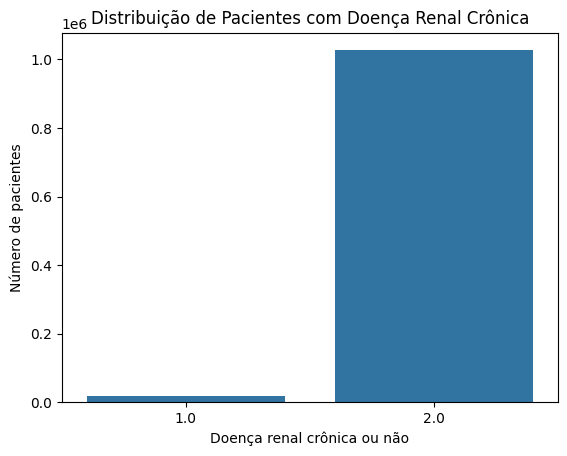

In [ ]:
# Contagem por Doença Renal Crônica
sns.countplot(x='renal_chronic', data=df)
plt.title('Distribuição de Pacientes com Doença Renal Crônica')
plt.xlabel('Doença renal crônica ou não')
plt.ylabel('Número de pacientes')
plt.show()

### tobacco
Identifica se o paciente é tabagista ou não

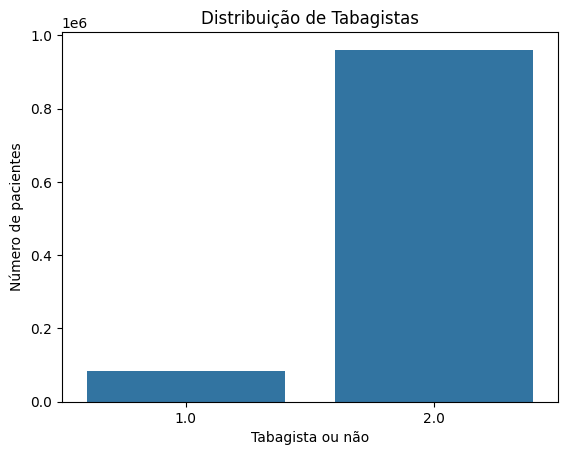

In [ ]:
# Contagem por tabagistas
sns.countplot(x='tobacco', data=df)
plt.title('Distribuição de Tabagistas')
plt.xlabel('Tabagista ou não')
plt.ylabel('Número de pacientes')
plt.show()

### classifaction_final
Representa a classificação do paciente, (possui covid, não possui covid/inconclusivo)

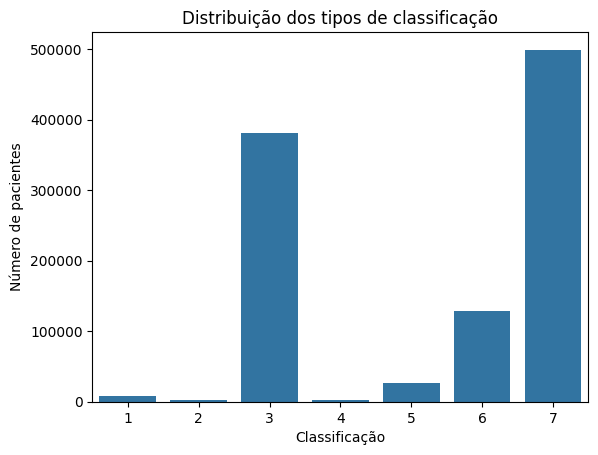

In [ ]:
# Contagem por tipo de classificação
sns.countplot(x='clasiffication_final', data=df)
plt.title('Distribuição dos tipos de classificação')
plt.xlabel('Classificação')
plt.ylabel('Número de pacientes')
plt.show()

Analisando o gráfico, é possível identificar que a maior parte dos pacientes foram classificados como sem covid ou resultado inconclusivo (4-7) aproximadamente 700.000 pacientes, o restante dos pacientes foram classificados com covid em diferentes graus (1-3).

### icu
Identifica se o paciente foi internado na UTI

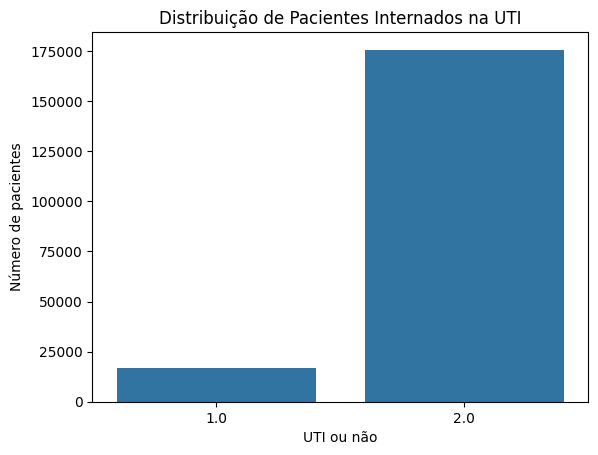

In [ ]:
# Contagem por UTI
sns.countplot(x='icu', data=df)
plt.title('Distribuição de Pacientes Internados na UTI')
plt.xlabel('UTI ou não')
plt.ylabel('Número de pacientes')
plt.show()

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Criação e ajustes de Classes

O primeiro passo é criar uma nova variavel para guardar a informação de se o paciente morreu ou não.

In [ ]:
# Criação da coluna 'died' como classe binária, caso exista data de morte o valor é 1 (died), caso não exista 0 (survived)
df['died'] = df['date_died'].notna().astype(int)

Após a criação da variável que indica se o paciente foi a óbito ou não, torna-se possível realizar análises mais aprofundadas com base nesse desfecho. Essa nova informação permite investigar relações com outras variáveis do conjunto de dados, como comorbidades, faixa etária, sexo e tipo de atendimento, enriquecendo a análise exploratória e possibilitando a construção de modelos preditivos.

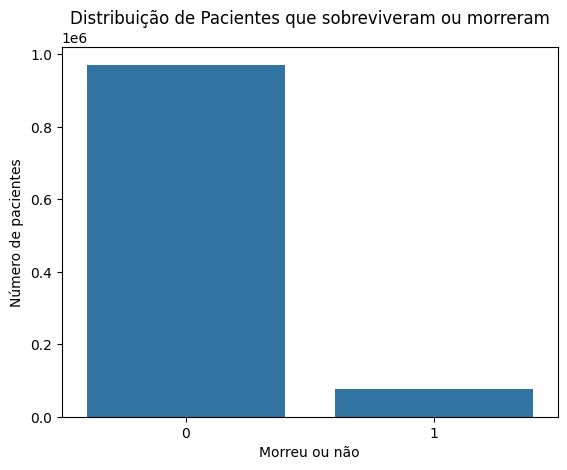

In [ ]:
# Contagem por Mortos ou nao
sns.countplot(x='died', data=df)
plt.title('Distribuição de Pacientes que sobreviveram ou morreram')
plt.xlabel('Morreu ou não')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico revela um forte desbalanceamento entre pacientes que sobreviveram e os que foram a óbito, com a maioria absoluta tendo sobrevivido. Esse padrão, embora esperado em contextos populacionais amplos, exige atenção na análise e principalmente na modelagem preditiva, pois algoritmos podem favorecer a classe majoritária. Assim, é fundamental aplicar técnicas de balanceamento de classes e avaliar métricas além da acurácia para garantir que o modelo identifique corretamente os casos de maior risco.

### Análises aprofundadas com a classe 'died'

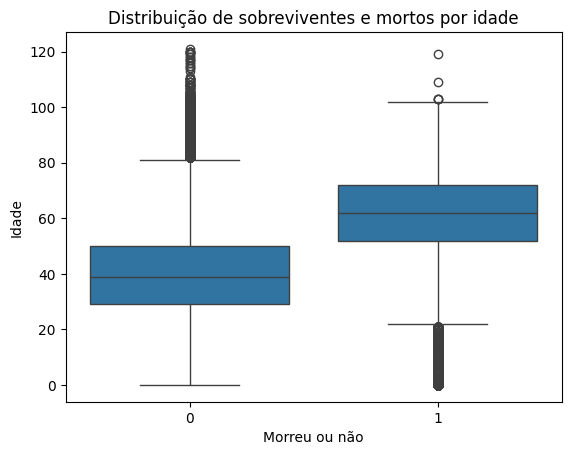

In [ ]:
# Distribuição de sobreviventes e mortos por idade
sns.boxplot(x='died', y='age', data=df)
plt.title('Distribuição de sobreviventes e mortos por idade')
plt.xlabel('Morreu ou não')
plt.ylabel('Idade')
plt.show()

O gráfico de boxplot é especialmente útil neste caso, pois evidencia de forma clara a relação entre idade e mortalidade. Observa-se que os pacientes que sobreviveram estão majoritariamente concentrados entre 30 e 50 anos, enquanto entre os que foram a óbito, a concentração se dá entre 50 e 75 anos. Além disso, a mediana de idade dos que morreram é consideravelmente mais alta, sugerindo uma forte associação entre o avanço da idade e o risco de morte por COVID-19. Ainda assim, é importante destacar a presença de outliers em ambas as categorias, reforçando que a idade, embora relevante, não é o único fator determinante.

### Avaliando comorbidades

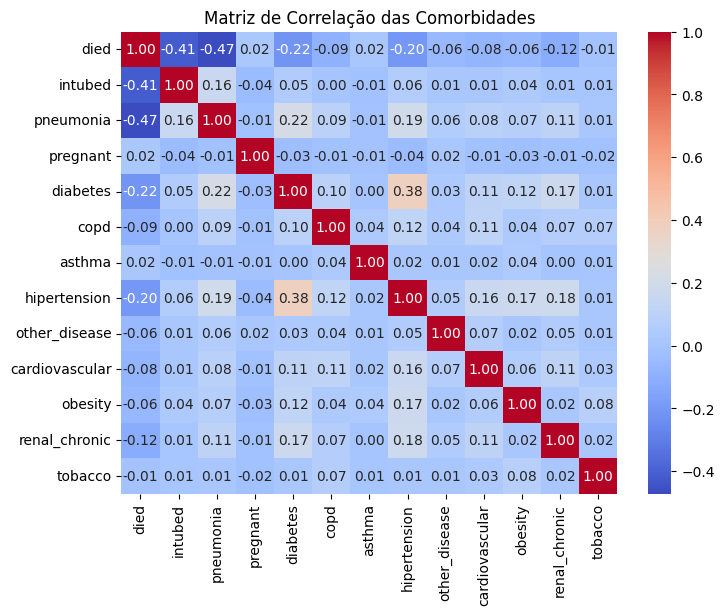

In [ ]:
corr = df[['died', 'intubed', 'pneumonia', 'pregnant', 'diabetes', 'copd', 'asthma',
           'hipertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Comorbidades')
plt.show()

A análise da matriz de correlação revelou que algumas variáveis clínicas possuem relação relevante com o desfecho de óbito. As variáveis pneumonia e intubação apresentaram as maiores correlações negativas com a variável *died*, indicando que pacientes com essas condições têm maior probabilidade de morte. Outras comorbidades como diabetes, hipertensão e doença renal crônica também mostraram correlações negativas, embora mais fracas. Esse padrão se justifica pelo fato de os dados estarem codificados como 1 para presença da condição e 2 para ausência, o que inverte o sinal da correlação. Observou-se ainda que a maioria das comorbidades apresenta baixa correlação entre si, reduzindo preocupações com multicolinearidade em análises futuras. Dessa forma, a matriz de correlação contribui para destacar quais fatores clínicos podem estar mais associados ao risco de morte e serve como base para aprofundar a investigação com métodos estatísticos e preditivos mais robustos.

In [ ]:
# Ajustando o campo date_died para o formato datetime
df['date_died'] = pd.to_datetime(df['date_died'], errors='coerce')

In [ ]:
# Criação do campo age_group (faixa etária) para facilitar análises relacionadas a idades.
bins = [0, 18, 30, 50, 65, 80, 120]
labels = ['0-18', '19-30', '31-50', '51-65', '66-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

Mostrando a eficiência de análise por faixa etária:

/tmp/ipython-input-125-2354102539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_obitos = df.groupby('age_group')['died'].mean().reset_index()
/tmp/ipython-input-125-2354102539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=proporcao_obitos, x='age_group', y='died', palette='Reds')


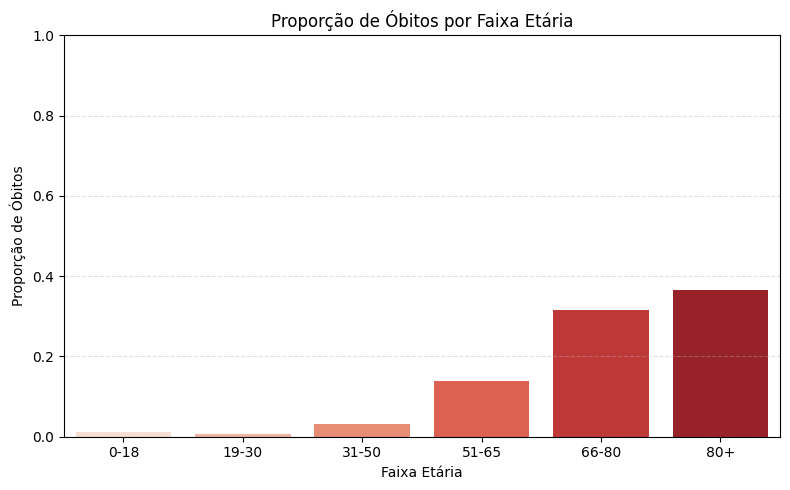

In [ ]:
# Agrupa e calcula proporção de óbitos por faixa etária
proporcao_obitos = df.groupby('age_group')['died'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=proporcao_obitos, x='age_group', y='died', palette='Reds')

plt.title('Proporção de Óbitos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Óbitos')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

O gráfico de proporção de óbitos por faixa etária é bastante informativo e revela de forma clara que o risco de morte por COVID-19 aumenta significativamente com a idade. A segmentação das faixas etárias está bem definida e permite observar que a partir dos 51 anos, especialmente acima dos 66, a proporção de óbitos se eleva de maneira acentuada. Utilizar a proporção como métrica foi uma escolha adequada, pois evita distorções causadas por diferentes tamanhos de grupos. A visualização é clara, reforçada pelo uso de cores que indicam gravidade. Para aprimorar ainda mais, seria interessante incluir os valores numéricos sobre as barras e, se possível, complementar com a quantidade total de casos por faixa, para melhor contextualização. O gráfico, portanto, cumpre bem seu papel ao evidenciar a maior vulnerabilidade de pacientes idosos à doença.

## Altearndo classes binarias (1-2) para (0-1) e conversão para boolean

Essa transformação é importante porque, em sua forma original (1 = sim, 2 = não), os algoritmos de machine learning podem interpretar os valores como hierárquicos ou ordinais, o que não reflete a realidade dessas variáveis. Ao reconfigurar para o padrão binário (0 = não, 1 = sim), garantimos que os modelos tratem essas variáveis de forma puramente categórica, evitando distorções na análise e melhorando a interpretação dos resultados.



In [ ]:
# Lista das colunas binárias codificadas como 1/2
binarias_12 = [
    'intubed', 'pneumonia', 'pregnant', 'diabetes',
    'copd', 'asthma', 'inmsupr', 'hipertension', 'other_disease',
    'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'icu'
]

# Substitui 2 por 0 nessas colunas
df[binarias_12] = df[binarias_12].replace({2: 0})

In [ ]:
for col in binarias_12:
    print(f"{col}: {df[col].unique()}")

intubed: [nan  1.  0.]
pneumonia: [ 1.  0. nan]
pregnant: [ 0. nan  1.]
diabetes: [ 0.  1. nan]
copd: [ 0.  1. nan]
asthma: [ 0.  1. nan]
inmsupr: [ 0.  1. nan]
hipertension: [ 1.  0. nan]
other_disease: [ 0.  1. nan]
cardiovascular: [ 0.  1. nan]
obesity: [ 0.  1. nan]
renal_chronic: [ 0.  1. nan]
tobacco: [ 0.  1. nan]
icu: [nan  0.  1.]


In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   usmer                 1048575 non-null  int64         
 1   medical_unit          1048575 non-null  int64         
 2   sex                   1048575 non-null  int64         
 3   patient_type          1048575 non-null  int64         
 4   date_died             30492 non-null    datetime64[ns]
 5   intubed               192706 non-null   float64       
 6   pneumonia             1032572 non-null  float64       
 7   age                   1048575 non-null  int64         
 8   pregnant              521310 non-null   float64       
 9   diabetes              1045237 non-null  float64       
 10  copd                  1045572 non-null  float64       
 11  asthma                1045596 non-null  float

In [ ]:
# Converte para tipo booleano
df[binarias_12] = df[binarias_12].astype('boolean')

In [ ]:
for col in binarias_12:
    print(f"{col}: {df[col].unique()}")

intubed: <BooleanArray>
[<NA>, True, False]
Length: 3, dtype: boolean
pneumonia: <BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean
pregnant: <BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean
diabetes: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
copd: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
asthma: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
inmsupr: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
hipertension: <BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean
other_disease: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
cardiovascular: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
obesity: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
renal_chronic: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
tobacco: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
icu: <BooleanArray>
[<NA>, False, True]
Length: 3, dtype: boolean


In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   usmer                 1048575 non-null  int64         
 1   medical_unit          1048575 non-null  int64         
 2   sex                   1048575 non-null  int64         
 3   patient_type          1048575 non-null  int64         
 4   date_died             30492 non-null    datetime64[ns]
 5   intubed               192706 non-null   boolean       
 6   pneumonia             1032572 non-null  boolean       
 7   age                   1048575 non-null  int64         
 8   pregnant              521310 non-null   boolean       
 9   diabetes              1045237 non-null  boolean       
 10  copd                  1045572 non-null  boolean       
 11  asthma                1045596 non-null  boole

## Tratamento de Valores Nulos

O dataset COVID-19 original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset COVID:")
df.isnull().sum()

Valores nulos no dataset COVID:


,0
usmer,0
medical_unit,0
sex,0
patient_type,0
date_died,1018083
intubed,855869
pneumonia,16003
age,0
pregnant,527265
diabetes,3338


## Preenchimento com a moda (0/false)
As variáveis de comorbidades no dataset são binárias e indicam a presença ou ausência de condições médicas, como diabetes, hipertensão, asma, entre outras. Quando há ausência de valor, faz sentido assumir que a condição não foi registrada porque o paciente não a possui.

Preencher os valores nulos com 0 (ou False) evita distorções nos modelos, mantém a integridade da análise e reduz perdas de informação, uma vez que valores nulos podem excluir registros durante o treinamento. Essa abordagem é coerente com a natureza dos dados clínicos e com boas práticas de pré-processamento.

In [ ]:
comorbidades = [
    'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
    'hipertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'other_disease'
]
df[comorbidades] = df[comorbidades].fillna(False)

In [ ]:
df['intubed'] = df['intubed'].fillna(False)
df['icu'] = df['icu'].fillna(False)

Como homens biologicamente não podem engravidar, os registros do sexo masculino foram atribuídos como 0 (ou False) no campo *pregnant*. Para os registros do sexo feminino, os valores nulos também foram considerados como ausência de gravidez, sendo preenchidos igualmente com 0.

In [ ]:
df.loc[df['sex'] == 2, 'pregnant'] = False
df['pregnant'] = df['pregnant'].fillna(False)

Como ja foi criada a categoria *died* para identificar a se o paciente morreu ou não o campo *date_died* não sera mais necessário.

In [ ]:
df = df.drop(columns='date_died')

In [ ]:
# Verificar a presença de valores nulos no dataset
print("Valores nulos no dataset COVID:")
df.isnull().sum()

Valores nulos no dataset COVID:


,0
usmer,0
medical_unit,0
sex,0
patient_type,0
intubed,0
pneumonia,0
age,0
pregnant,0
diabetes,0
copd,0


*age_group* é apenas utilizado para analise não sendo necessário tratar

## Separação treino-teste

Antes da normalização, padronização e one-hot enconding é importante realizar a separação entre treino e teste para evitar vazamento de dados de uma amostra para outra.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('died', axis=1)
y = df['died']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (734002, 21)
Dimensões de X_test: (314573, 21)
Dimensões de y_train: (734002,)
Dimensões de y_test: (314573,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

Nesse caso sera aplicado apenas em idade pois é a unica variavel númerica continua do dataset.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
X_train_normalized = X_train
X_train_normalized['age_normalized'] = scaler_norm.fit_transform(X_train_normalized[['age']])

X_test_normalized = X_test
X_test_normalized['age_normalized'] = scaler_norm.fit_transform(X_test_normalized[['age']])

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
df_normalized.head()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,age_group,age_normalized
440978,2,11,2,1,False,False,59,False,False,False,...,False,False,False,False,False,False,3,False,51-65,0.491667
31116,1,4,2,2,True,False,48,False,False,False,...,False,False,False,False,False,False,3,False,31-50,0.400000
936780,1,12,2,1,False,False,17,False,False,False,...,False,False,False,False,False,False,7,False,0-18,0.141667
532417,2,12,1,1,False,False,51,False,False,False,...,False,False,False,False,False,False,3,False,51-65,0.425000
35403,1,4,2,2,False,True,82,False,False,False,...,True,True,False,False,False,False,7,False,80+,0.683333


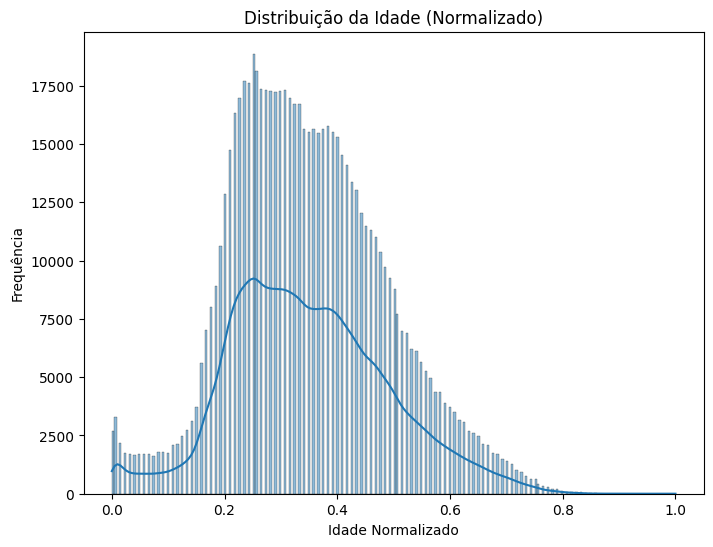

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['age_normalized'], kde=True)
plt.title('Distribuição da Idade (Normalizado)')
plt.xlabel('Idade Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *age* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

Nesse caso sera aplicado apenas em idade pois é a unica variavel númerica continua do dataset.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
X_train_standardized = X_train
X_train_standardized['age_standardized'] = scaler_std.fit_transform(X_train_standardized[['age']])

X_test_standardized = X_test
X_test_standardized['age_standardized'] = scaler_std.fit_transform(X_test_standardized[['age']])

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
df_standardized.head()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,age_group,age_normalized,age_standardized
440978,2,11,2,1,False,False,59,False,False,False,...,False,False,False,False,False,3,False,51-65,0.491667,1.016359
31116,1,4,2,2,True,False,48,False,False,False,...,False,False,False,False,False,3,False,31-50,0.400000,0.365767
936780,1,12,2,1,False,False,17,False,False,False,...,False,False,False,False,False,7,False,0-18,0.141667,-1.467721
532417,2,12,1,1,False,False,51,False,False,False,...,False,False,False,False,False,3,False,51-65,0.425000,0.543201
35403,1,4,2,2,False,True,82,False,False,False,...,True,False,False,False,False,7,False,80+,0.683333,2.376688


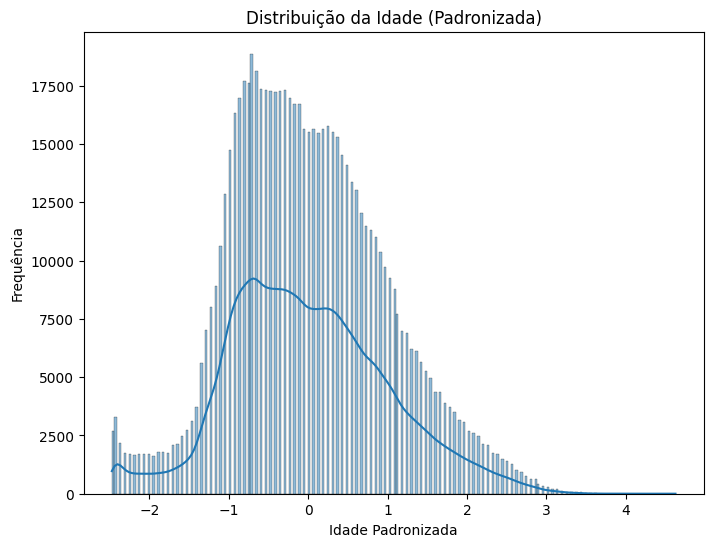

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['age_standardized'], kde=True)
plt.title('Distribuição da Idade (Padronizada)')
plt.xlabel('Idade Padronizada')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um.

## One-hot encoding

Essa técnica se faz necessária em váriaveis categoricas mas que não existe uma hierarquia clara nos

Na base de dados já vem aplicada a técnica de label enconding que já atende a necessidade, por exemplo na coluna usmr que identifica o nivel da unidade médica em que o paciente foi atendido.
Sendo assim, a aplicação do One-hot enconding sera aplicada nas variaveis categoricas ('sex', 'medical_unit', 'classification', 'patient_type')

In [ ]:
# Aplica One-Hot Encoding nas colunas categóricas
df_standardized = pd.get_dummies(
    df_standardized,
    columns=['sex', 'medical_unit', 'clasiffication_final', 'patient_type'],
    prefix=['sex', 'unit', 'class', 'ptype'],
    drop_first=False
)

In [ ]:
df_standardized.columns[df_standardized.columns.str.startswith(('sex_', 'unit_', 'class_', 'ptype_'))]

Index(['sex_1', 'sex_2', 'unit_1', 'unit_2', 'unit_3', 'unit_4', 'unit_5',
       'unit_6', 'unit_7', 'unit_8', 'unit_9', 'unit_10', 'unit_11', 'unit_12',
       'unit_13', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5',
       'class_6', 'class_7', 'ptype_1', 'ptype_2'],
      dtype='object')

In [ ]:
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734002 entries, 440978 to 461163
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   usmer             734002 non-null  int64   
 1   intubed           734002 non-null  boolean 
 2   pneumonia         734002 non-null  boolean 
 3   age               734002 non-null  int64   
 4   pregnant          734002 non-null  boolean 
 5   diabetes          734002 non-null  boolean 
 6   copd              734002 non-null  boolean 
 7   asthma            734002 non-null  boolean 
 8   inmsupr           734002 non-null  boolean 
 9   hipertension      734002 non-null  boolean 
 10  other_disease     734002 non-null  boolean 
 11  cardiovascular    734002 non-null  boolean 
 12  obesity           734002 non-null  boolean 
 13  renal_chronic     734002 non-null  boolean 
 14  tobacco           734002 non-null  boolean 
 15  icu               734002 non-null  boolean 
 16  ag

## Conclusão

A análise e o pré-processamento do dataset de COVID-19 reforçam a importância de compreender a estrutura e a qualidade dos dados antes da aplicação de modelos preditivos. O conjunto de dados, apesar de extenso, apresenta diversos valores nulos e inconsistências que exigiram um tratamento cuidadoso, especialmente nas variáveis binárias e categóricas. A criação de uma variável alvo (*died*) a partir da coluna *date_died* possibilitou uma análise direcionada à mortalidade, permitindo observar padrões relevantes relacionados a comorbidades e idade dos pacientes.

A análise exploratória revelou informações importantes, como a maior mortalidade entre pacientes idosos, evidenciada por gráficos como o boxplot e o histograma de idade. A criação de faixas etárias ajudou a visualizar a gravidade dos casos com mais clareza. Também foi possível verificar que comorbidades como diabetes, hipertensão e doença pulmonar obstrutiva crônica (DPOC) estão mais associadas aos casos de óbito. O uso de técnicas como a conversão de valores binários, imputação de dados ausentes e codificação de variáveis categóricas foi fundamental para padronizar o conjunto de dados.

As hipóteses iniciais puderam ser investigadas:

1. **Existe relação entre idade e mortalidade por COVID-19?**  
  Sim, há uma clara associação, com maior mortalidade entre pacientes acima dos 50 anos.

2. **Comorbidades aumentam a chance de óbito?**  
  Sim, especialmente doenças como hipertensão, diabetes e DPOC mostraram correlação com o desfecho fatal.

3. **A intubação e o uso de UTI indicam maior gravidade e risco de morte?**  
  Sim, pacientes que foram intubados ou internados em UTI apresentaram maior taxa de mortalidade.

A análise evidencia que, mesmo antes da modelagem, é possível extrair informações valiosas por meio da exploração e preparação cuidadosa dos dados, o que contribui diretamente para a construção de modelos mais eficazes e interpretações mais confiáveis.
